# <center>Apple Inc. Stock Price Analysis and Forecasting</center>

<center><img src="https://images.unsplash.com/photo-1585184394271-4c0a47dc59c9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=871&q=80"></center>

# About the Dataset

The data used in this project consist of the historical stock prices of AAPL obtained via Yahoo Finance. Data set contains the following variables; Date (January 2015 - August 2022), Open, High, Low, Close, Adjusted Close and Volume.

# Importing Essential Libraries and Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Loading the Data

In [2]:
df = pd.read_csv("../input/apple-stock-dataset-20152022-august/AAPL.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.644018,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.949759,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.952007,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.287870,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.221075,237458000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1913,2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500
1914,2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500
1915,2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200
1916,2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400
1917,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54023100


As we can see, there are 1918 trading days even though the number of days in this period of time is much larger than 1918. This is because the stock market is not open on weekend and some USA's speacial days such as Independence day, Christmas Day, New Year's Eve and so forth.

In [5]:
df.shape

(1918, 7)

In [6]:
df.describe().T.apply(lambda x: x.apply("{0:.3f}".format))

,count,mean,std,min,25%,50%,75%,max
Open,1918.000,69.222,47.033,22.500,32.003,46.914,114.965,182.630
High,1918.000,70.004,47.656,22.918,32.242,47.238,116.330,182.940
Low,1918.000,68.479,46.443,22.367,31.736,46.491,113.424,179.120
Close,1918.000,69.278,47.082,22.585,31.961,46.939,115.033,182.010
Adj Close,1918.000,67.671,47.613,20.950,29.046,45.162,113.660,181.260
Volume,1918.000,134109050.104,68513816.423,41000000.000,87937600.000,114458650.000,160385400.000,648825200.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1918 non-null   object 
 1   Open       1918 non-null   float64
 2   High       1918 non-null   float64
 3   Low        1918 non-null   float64
 4   Close      1918 non-null   float64
 5   Adj Close  1918 non-null   float64
 6   Volume     1918 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 105.0+ KB


The data type of our Date column should be converted into an appropriate format so that we can work with that variable when visualizing the data.

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.duplicated().sum()

0

There are no missing values and duplicates so the data seems clear so far.

# Time Series Analysis

In order to visualize the data on some period, the index of dataframe should be set to Date column.

In [11]:
df = df.set_index("Date")

In [12]:
fig = make_subplots(rows=6, cols=1, 
                    subplot_titles=("Opening Price", "Closing Price", "Highest Price", 
                                    "Lowest Price", "Adjusted Closing Price", "Volume"))

fig.add_trace(go.Scatter(x=df.index, y=df["Open"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Close"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["High"]), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Low"]), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Adj Close"]), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Volume"]), row=6, col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

In [13]:
fig = go.Figure(data=go.Ohlc(x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"]))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title_text="OHLC Chart", title_x=0.5)
fig.show()

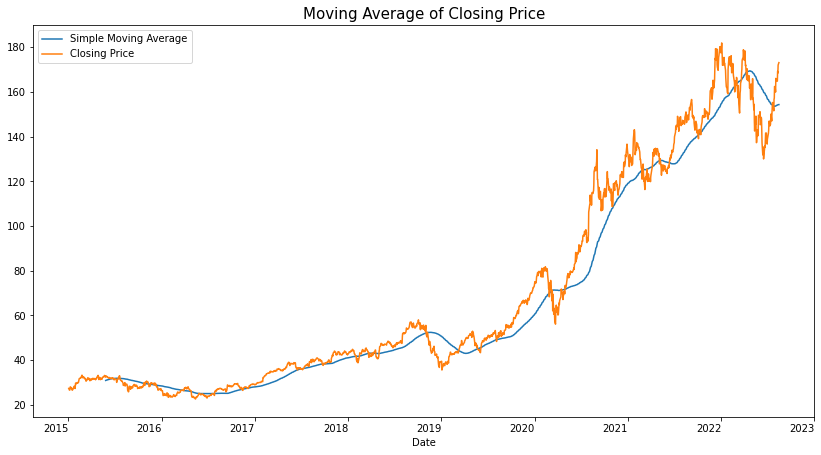

In [14]:
simple_ma = df["Close"].rolling(window=100).mean()

plt.figure(figsize=(14,8))
simple_ma.plot(label="Simple Moving Average")
df["Close"].plot(label="Closing Price")
plt.xticks(rotation=0)
plt.title("Moving Average of Closing Price", size=15)
plt.legend()
plt.show()

On average, there are 252 trading days in a year so it can be seen that there is a yearly seasonality when I pass in 252 to the parameter "period".

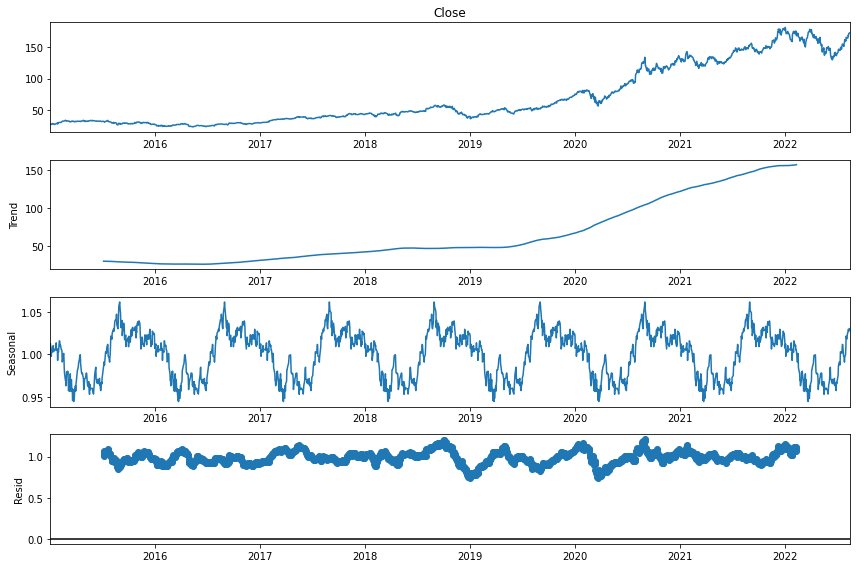

In [15]:
results = seasonal_decompose(df["Close"], model="multiplicative", period=252)
fig = results.plot()
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.show()

### Data Splitting

Since the model we will be using is SARIMA, it takes a little while to train it with a seasonal length like 252. Generally, passing in 4 for quarterly data or 12 for monthly data is common. So, I sum the closing price in a month so that the data has monthly periodicity.

In [16]:
df = df.resample("MS").sum()

I preferred to take 80% of the data as train set and the rest 20% as test set.

In [17]:
df = df.reset_index()

size = int(len(df)*0.8)
train = df.loc[:size,["Date", "Close"]]
test = df.loc[size+1:, ["Date", "Close"]]

df = df.set_index("Date")
train = train.set_index("Date")
test = test.set_index("Date")

In [18]:
print("Train size:", len(train))
print("Test size:", len(test))
print("Is sum of train and test sizes equal to whole data size:", len(train)+len(test) == df["Close"].shape[0])

Train size: 74
Test size: 18
Is sum of train and test sizes equal to whole data size: True


### Checking Stationarity

I define a function for applying the Augmented Dickey-Fuller Test to the data. ADF Test tests the null hypothesis that the time series data has a unit root which means the data is non-stationary.

In [19]:
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of Lags: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print('Critial Values:')
    for key, value in result[4].items():
        print(f'\t{key}, {value}')

As you can see, I fail to reject H0 (null) hypothesis. Next step is to difference the data so that time series data has no unit root, hence stationary. Meaning that the data has constant mean and variance over time.

In [20]:
adf_test(train["Close"])

ADF Test Statistic: 1.4204364606774402
p-value: 0.9972050324428232
Number of Lags: 4
Number of Observations Used: 69
Critial Values:
	1%, -3.528889992207215
	5%, -2.9044395987933362
	10%, -2.589655654274312


### Removing the Stationarity

I difference the data by one step.

In [21]:
differenced_df = train["Close"] - train["Close"].shift()

After applying the ADF test to the differenced data, I have enough evidence to reject null hypothesis as p value is way too lower than 0.05. In this place, I have seen that differencing the data by one step is enough for making the data stationary so I decide the "d" value as 1.

In [22]:
adf_test(differenced_df.dropna())

ADF Test Statistic: -4.587060332980802
p-value: 0.00013645215766488512
Number of Lags: 3
Number of Observations Used: 69
Critial Values:
	1%, -3.528889992207215
	5%, -2.9044395987933362
	10%, -2.589655654274312


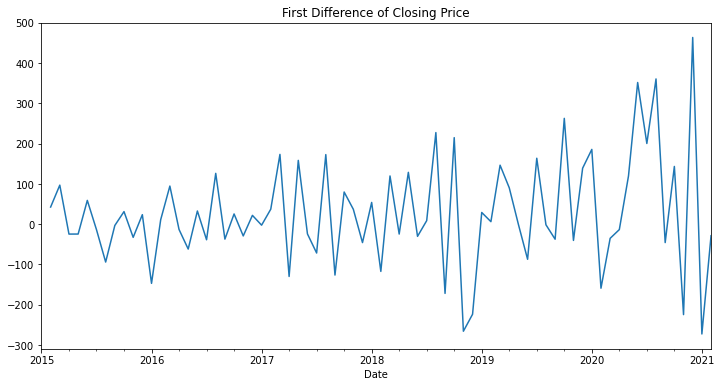

In [23]:
plt.figure(figsize=(12, 6))
differenced_df.plot()
plt.title("First Difference of Closing Price")
plt.show()

### Determining the p and q Values

SARIMA model is comprised of 4 parts; S (Seasonal), p (Autoregressive), d (Integrated) and q (Moving Average). As I already know d value and what kind of seasonality is present in the data, there are one thing left to do: determining p and q values (p for AR part and q for MA). I simply plot the Autocorrelation and Partial Autocorrelation graphs for determining q and p values respectively. Looking at the ACF and PACF plot, it can be observed that first lags of each plot are outside the blue area meaning that those values are statistically significant. So I determine the p and q values as 1.

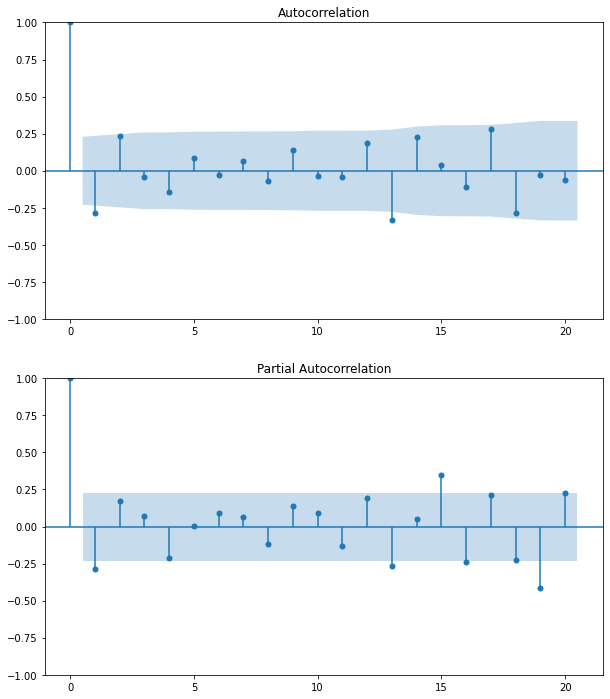

In [24]:
fig, ax = plt.subplots(2 ,1, figsize=(10, 12))
plot_acf(differenced_df.iloc[1:], lags=20, ax=ax[0])
plot_pacf(differenced_df.iloc[1:], lags=20, ax=ax[1])
plt.show()

# Model Building

Since the data contains the sum of closing prices in a month, I drop the date August 2022 because I make this project in the August 2022 and we can only calculate the sum of closing prices of this month in September 2022 (which is future).

In [25]:
df.drop("2022-08-01", axis=0, inplace=True)
df = df.reset_index()

I decided to build a SARIMA model because of the yearly seasonality present in the data.

In [26]:
sarima = sm.tsa.statespace.SARIMAX(df.loc[:73, "Close"], order=(1,1,1), seasonal_order=(1,1,1,12))
results = sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31827D+00    |proj g|=  1.11342D-01

At iterate    5    f=  5.30517D+00    |proj g|=  7.17660D-02

At iterate   10    f=  5.29210D+00    |proj g|=  3.96712D-03


 This problem is unconstrained.



At iterate   15    f=  5.29115D+00    |proj g|=  5.71295D-03

At iterate   20    f=  5.29047D+00    |proj g|=  3.27130D-03

At iterate   25    f=  5.28877D+00    |proj g|=  2.12027D-03

At iterate   30    f=  5.28462D+00    |proj g|=  4.39951D-03

At iterate   35    f=  5.28263D+00    |proj g|=  1.25991D-03

At iterate   40    f=  5.28236D+00    |proj g|=  4.42220D-04

At iterate   45    f=  5.28211D+00    |proj g|=  8.33347D-04

At iterate   50    f=  5.28207D+00    |proj g|=  1.22763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   1.228D-04   5.282D+00
  F =   5.28207001568

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   74
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -390.873
Date:                            Sat, 03 Sep 2022   AIC                            791.746
Time:                                    23:50:01   BIC                            802.301
Sample:                                         0   HQIC                           795.883
                                             - 74                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9664      0.392     -2.465      0.014      -1.735      -0.198
ma.L1          0.8714      0.373      2.334      0.020       0.140       1.603
ar.S.L12       0.3250      0.304      1.069      0.285      -0.271       0.921
ma.S.L12      -0.9981     48.888     -0.020      0.984     -96.817      94.820
sigma2      1.701e+04   8.27e+05      0.021      0.984    -1.6e+06    1.64e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.72   Prob(JB):                         0.36
Heteroskedasticity (H):               5.65   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
df["forecast_train"] = results.predict(start=0, end=73)

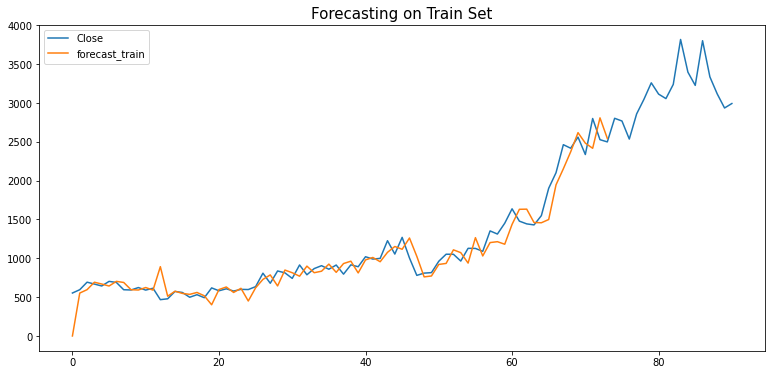

In [29]:
df[["Close", "forecast_train"]].plot(figsize=(13,6))
plt.title("Forecasting on Train Set", size=15)
plt.show()

In [30]:
df["forecast_test"] = results.forecast(17)

In [31]:
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,forecast_train,forecast_test
71,2020-12-01,2797.310014,2829.380013,2766.009972,2800.390007,2771.762262,2322189600,2416.849273,NaN
72,2021-01-01,2528.920014,2566.330045,2488.599991,2527.700005,2501.859819,2240262000,2808.814964,NaN
73,2021-02-01,2508.429992,2528.270012,2468.659995,2499.099997,2476.449180,1833855600,2544.196870,NaN
74,2021-03-01,2808.010020,2839.850006,2769.310005,2803.039986,2778.530923,2650418200,NaN,2464.831383
75,2021-04-01,2765.120019,2791.139999,2739.770014,2768.070016,2743.866775,1889857500,NaN,2527.819095
76,2021-05-01,2540.700013,2563.160001,2516.479988,2535.679999,2516.905502,1711934900,NaN,2525.080289
77,2021-06-01,2848.770020,2874.340025,2832.749999,2859.089991,2838.904741,1606590000,NaN,2762.039775
78,2021-07-01,3035.980041,3071.300034,3014.309999,3047.930007,3026.411517,1919035100,NaN,2788.761203
79,2021-08-01,3252.720002,3282.969999,3231.039978,3259.910003,3240.871659,1461542800,NaN,3063.663053
80,2021-09-01,3129.040009,3149.900009,3091.629974,3114.429993,3097.075346,1797835100,NaN,2940.010420


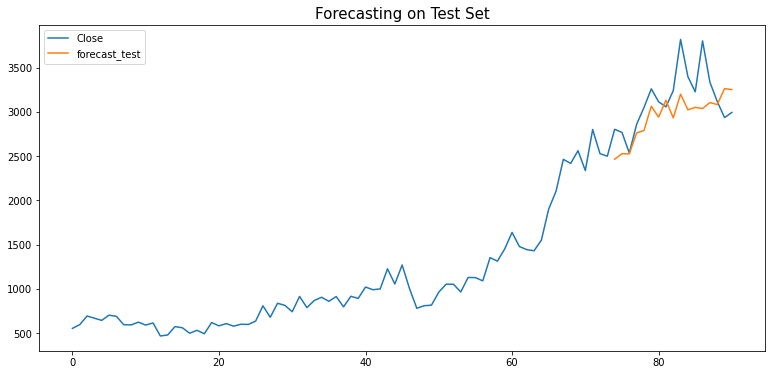

In [32]:
df[["Close", "forecast_test"]].plot(figsize=(13,6))
plt.title("Forecasting on Test Set", size=15)
plt.show()

In [33]:
print("Model Performance on Train Set")
print("-"*20)
print("Mean Absolute Error (MAE):", mean_absolute_error(df.loc[:73,"Close"], df.loc[:73,"forecast_train"]))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(df.loc[:73,"Close"], df.loc[:73,"forecast_train"]))

Model Performance on Train Set
--------------------
Mean Absolute Error (MAE): 109.92401049976459
Mean Absolute Percentage Error (MAPE): 0.11579835839162306


In [34]:
print("Model Performance on Test Set")
print("-"*30)
print("Mean Absolute Error (MAE):", mean_absolute_error(df.loc[74:,"Close"], df.loc[74:,"forecast_test"]))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(df.loc[74:,"Close"], df.loc[74:,"forecast_test"]))

Model Performance on Test Set
------------------------------
Mean Absolute Error (MAE): 263.6039955806207
Mean Absolute Percentage Error (MAPE): 0.0806859803306094


# Forecasting Closing Price From August 2022 to 2023

It's time to forecast the sum of closing prices of future months from August 2022 to 2023 (excluding January 2023). I create future dates to predict the corresponding closing prices.

In [35]:
df = df.set_index("Date")

future_dates=[df.index[-1]+ pd.DateOffset(months=x) for x in range(1,6)]
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
df_for_forecast = pd.concat([df, future_df])

df_for_forecast = df_for_forecast.reset_index()
df_for_forecast.rename(columns={"index": "Date"}, inplace=True)

In [36]:
df_for_forecast["future_forecast"] = results.predict(start=90, end=95)

In [37]:
df_for_forecast = df_for_forecast.set_index("Date")
df_for_forecast["future_forecast"].tail()

Date
2022-08-01    3480.806166
2022-09-01    3348.825179
2022-10-01    3539.115570
2022-11-01    3363.984970
2022-12-01    3553.282358
Name: future_forecast, dtype: float64

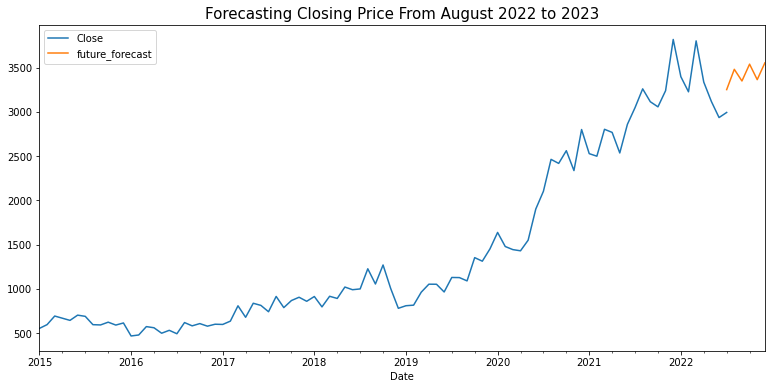

In [38]:
df_for_forecast[["Close", "future_forecast"]].plot(figsize=(13,6))
plt.title("Forecasting Closing Price From August 2022 to 2023", size=15)
plt.show()

As it can be seen, the forecasted values indicate that there is going to be increase in the closing price of AAPL within the next 5 months.

<center><h3>Thank you for reading the notebook so far. Preparing notebooks take a great deal of time. If you liked the notebook, please do not forget to give an upvote. Hope it helped... Peace out ✌️</h3></center>